# Continuous NMR analysis

Use this template as a starting point to carry out the analysis tasks.  For reference, here are links to recommended Python resources: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

## Standard Packages

This is a good idea at the beginning of your notebook to include the packages that you will need.  We will use those shown below here.  A brief description:
* `numpy` is the foundational package for Python numerical work. It extends and speeds up array operations beyond standard Python, and it includes almost all math functions that you would need for example `sqrt()` (square root) or `cos()` (cosine).  These would be written in code as `np.sqrt()` or `np.cos()`.
* `scipy` is a huge collection of scientific data analysis functions, routines, physicical constants, etc.  This is the second most used package for scientific work. Here we will use the physical constants library, `scipy.constants`.  Documentation is at [SciPy.org](https://docs.scipy.org/doc/scipy/reference/) with the constants subpackage at https://docs.scipy.org/doc/scipy/reference/constants.html.
* `uncertainties` is a very useful small package that simplifies uncertainty propagation and printing out of quantities with uncertainty. Documentation is at https://pythonhosted.org/uncertainties/
* `matplotlib` is *the* standard plotting package for scientific Python.  We will use a subset called `pyplot` which is modeled after the plotting functions used in MATLAB. The last line below, `%matplotlib inline`, simply forces the plots to appear within the notebook.
* `pandas` is a large data science package.  It's main feature is a set of methods to create and manipulate a "DataFrame," which is an enlargement of the idea of an array.  I plays well with NumPy and other packages.  We will use it mainly as a way to read files into data sets in an easy way.
* [LMFit](https://lmfit.github.io/lmfit-py/) is excellent for carrying out line and curve fits with many useful features.

## Task Summary

#### Measure $\gamma$ for protons
1. Import measurements of frequency and magnetic field taken multiple times (5-10) in order to establish uncertainty of individual measurements.  
2. Calculate the mean and standard deviation of each set of measurements.  Also calculate the percent uncetainty in each set. Use these results to establish uncertainties on the rest of the data points.
3. Import measurements of the resonant frequency $f_{\rm res}$ vs. static field $B_0$ for protons in water (+CuSO<sub>4</sub>) across the range of frequencies available with the oscillator.  
4. Include the uncertainty calculated in step 2.
5. Make a line fit and a plot of the data with the fit (use LMfit) to get the slope of $f_{\rm res}$ versus $B_0$.
6. Calculate $\gamma$ and the $g$-factor for the proton, including uncertainty.

#### Measure the resonance of <sup>19</sup>F versus <sup>1</sup>H
1. Import measurements listing measured B-field along with resonant frequencies of <sup>1</sup>H and <sup>19</sup>F at those field strengths.
2. Fit a line to the resonant frequency of <sup>19</sup>F versus resonant frequency of <sup>1</sup>H from the above data set, plot it (use LMfit) and obtain slope and its uncertainty.
3. From the results calculate $\gamma$ and associated $g$-factor for <sup>19</sup>F from the fit result and the accepted values known for <sup>1</sup>H.
4. Comment in your Group Notebook on the topic of observable chemical shift for fluorine

#### Trend of $T_2^*$ with paramagnetic ion concentration
If you can get quantitative values for how $T_2^*$ decays for a range of concentration, make a plot to see the trend.


In [2]:
# Usually import packages via a handle to the functions in them using import ... as ...
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
import scipy.constants as const
%matplotlib inline

In [3]:
# Useful plot default
mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 12 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font

## Magnetic moment of the proton

### Read in the multi-measurement data




In [4]:
# Read in the data to a Pandas dataframe and print a table.
multi = pd.read_csv('multi_measurement.csv')
multi

,B1,RF1,B2,RF2,B3,RF3
0,1.9,8.13221,2.199,9.40091,2.599,11.10260
1,1.9,8.13261,2.199,9.40074,2.599,11.10185
2,1.9,8.13167,2.199,9.40010,2.599,11.10155
3,1.9,8.13233,2.199,9.40013,2.599,11.10150
4,1.9,8.13189,2.199,9.40036,2.599,11.10162
5,1.9,8.13164,2.199,9.40046,2.599,11.10166
6,1.9,8.13229,2.199,9.39991,2.599,11.10157
7,1.9,8.13237,2.199,9.39998,2.599,11.10147
8,1.9,8.13235,2.199,9.39993,2.599,11.10171
9,1.9,8.13234,2.198,9.39880,2.599,11.10157


Calculate the mean and std for each RF frequency. Since we see that the magnetic field are mostly the same, we will take the mode as the mean value; we also noted that the systematic precision for the gauss meter is 0.001 kG, we will take 0.005 kG as the standard deviation that goes into any error propagation.

In [24]:
# Calculate the requested quantities
rf1_mean = multi['RF1'].mean()
rf2_mean = multi['RF2'].mean()
rf3_mean = multi['RF3'].mean()
rf1_std = multi['RF1'].std()
rf2_std = multi['RF2'].std()
rf3_std = multi['RF3'].std()
print('The mean of RF1 is', f"{rf1_mean:.6}")
print('The mean of RF2 is', f"{rf2_mean:.6}")
print('The mean of RF3 is', f"{rf3_mean:.6}")
print('The standard deviation of RF1 is', f"{rf1_std:.5f}")
print('The standard deviation of RF2 is', f"{rf2_std:.5f}")
print('The standard deviation of RF3 is', f"{rf3_std:.5f}")
print('The percent uncertainty of RF1 is', f"{rf1_std/rf1_mean:.5%}")
print('The percent uncertainty of RF2 is', f"{rf2_std/rf2_mean:.5%}")
print('The percent uncertainty of RF3 is', f"{rf3_std/rf3_mean:.5%}")



The mean of RF1 is 8.13218
The mean of RF2 is 9.40013
The mean of RF3 is 11.1017
The standard deviation of RF1 is 0.00031
The standard deviation of RF2 is 0.00058
The standard deviation of RF3 is 0.00033
The percent uncertainty of RF1 is 0.00383%
The percent uncertainty of RF2 is 0.00617%
The percent uncertainty of RF3 is 0.00299%


The standard deviations are (nearly) the same, which are all very small. Therefore, we take the standard deviation for the middle data (RF2) because it is the largest among the three as well as the one for which we have the largest confidence (since the signal is more clear for this frequency.)


### Read in the resonance data for protons

Use `read_csv()` as before.  You should have a table with at least 2 columns: resonance frequency and magnetic field. 

Print a table.

In [28]:
# Read in the data, and print the dataframe
h1_data = pd.read_csv('H1.csv')
h1_data

,B,RF
0,1.900,8.13217
1,1.999,8.55374
2,2.101,8.98077
3,2.200,9.40013
4,2.301,9.83182
5,2.400,10.26006
6,2.500,10.68068
7,2.600,11.10171


We then add the uncertianty array for B and RF, respectively, to this table.

In [29]:
# Include the uncertainty results as another column in the dataframe 
uh1_data = pd.read_csv('H1_with_unc.csv')
uh1_data

,B,B_unc,RF,RF_unc
0,1.900,0.0005,8.13217,0.00058
1,1.999,0.0005,8.55374,0.00058
2,2.101,0.0005,8.98077,0.00058
3,2.200,0.0005,9.40013,0.00058
4,2.301,0.0005,9.83182,0.00058
5,2.400,0.0005,10.26006,0.00058
6,2.500,0.0005,10.68068,0.00058
7,2.600,0.0005,11.10171,0.00058


### Fit the data to extract the slope

Use LMfit.  See the examples.

In [9]:
# Set  up the Model

# Import the Linear model.
from lmfit.models import LinearModel

# create an instance of the model
line = LinearModel()


In [30]:
# Get starting parameters. 
start_params = line.guess(uh1_data['RF'], x=uh1_data['B'])

# Feed these into the fitter and run it.
Line_fit = line.fit(uh1_data['RF'], start_params, x=uh1_data['B'], weights=1/uh1_data['RF_unc'])

# Print the fit results.
Line_fit

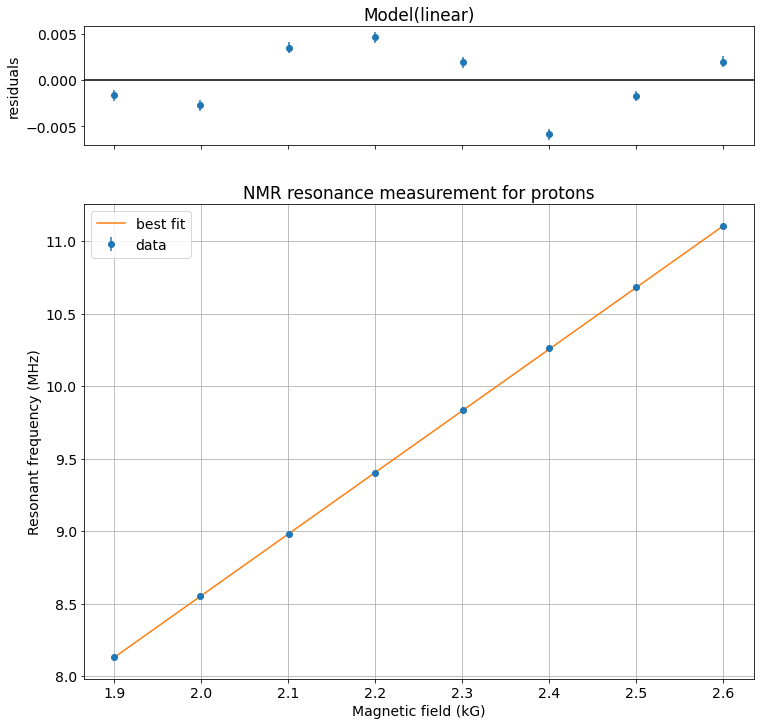

In [31]:
# Make a plot.
Line_fit.plot()
plt.grid(True)
plt.title('NMR resonance measurement for protons')
plt.xlabel('Magnetic field (kG)')
plt.ylabel('Resonant frequency (MHz)');

### Extract the slope with uncertainty from the fit parameters


In [32]:
proton_slope = unc.ufloat(Line_fit.params['slope'].value, Line_fit.params['slope'].stderr,'proton_slope')
print('gamma for protons = {:.2uP} MHz/kG'.format(proton_slope))

gamma for protons = 4.2474±0.0059 MHz/kG


Calculate $\gamma$ in rad/(s-T) to compare to accepted values:


In [36]:
# Here is an example of how to access the scipy.constants

expected_gamma = const.value('nuclear magneton in MHz/T')*const.value('proton g factor')
print('Expected value of gamma for proton: {:.6g} MHz/T'.format(expected_gamma))
print('Calculated value of gamma for proton: {:.6gP} MHz/T'.format(proton_slope*10))

Expected value of gamma for proton: 42.5775 MHz/T
Calculated value of gamma for proton: 42.4740±0.0591 MHz/T


Calculate the proton $g$-factor from your result and compare to the expected value.

In [14]:
# You code this


## Fluorine-19 versus Proton (Hydrogen-1) resonance

### Read in the data

Also, print a table.

In [15]:
# Use pd.read_csv(), as you did earlier


### Plot and fit the data.  

BUT: Here you are comparing the resonant frequencies only!  The magnetic field measurement does not matter, as long as it is stable between the two frequency measurements for each data point

In [16]:
# Make a fit and plot of fluorine resonant frequency versus hydrogen resonant frequency.


### Use the result

Obtain the slope with uncertainty and with the result calculate a value for $\gamma_F$ and the <sup>19</sup>F $g$-factor. 

In [17]:
# You code this


## Trend of $T_2^*$ as a function of paramagnetic ion concentration

From the scope screen images, extract estimates of the relaxation time $T_2^*$ as a function of concentration of the copper sulfate ions.  

Plot these on a plot with double-log axes.  To change the axis type of a plot use the functions

    plt.xscale('log')
    plt.yscale('log')
    
You should see a trend that the relaxation time gets a bit longer and then levels out as the concentration is decreased.

In [18]:
# You code this
